<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Revision-History" data-toc-modified-id="Revision-History-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Revision History</a></span></li><li><span><a href="#Basic-problem-statement" data-toc-modified-id="Basic-problem-statement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic problem statement</a></span></li><li><span><a href="#Data-Set-Information" data-toc-modified-id="Data-Set-Information-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Set Information</a></span></li><li><span><a href="#Attribute-Information" data-toc-modified-id="Attribute-Information-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Attribute Information</a></span></li><li><span><a href="#References-(add-your-references-below)" data-toc-modified-id="References-(add-your-references-below)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References (add your references below)</a></span></li></ul></div>

## Revision History

Update with your details here

Name: Shreya Arora

Date: 11-02-2023

## Basic problem statement 
Explore, understand and build on what factors influence energy consumption – for appliances and light - using the provided data for a house in Belgium. 

If it is feasible and/or required to build a model 
- can you outline the approach, 
- build a proof of concept model with the available data and 
- architect a scenario where/how the model could be used. 

Please answer below questions based on your understanding
- How can we improve this perceived system?
- what challenges do you see in deploying this system?
- can you propose a timeline based on this PoC for this development?

Please use the notebook to record your thought process and code. Once you have performed the assessment, respond back with your solution in 3 days. You will be required to walk through the notebook in a technical discussion. 

A basic workflow is defined via code comments, which you may use. Please ensure to include your references in the last cell. 

## Data Set Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

Data repository : [link](http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv)

## Attribute Information
* date : time year-month-day hour:minute:second
* Appliances, energy use in Wh 
* lights, energy use of light fixtures in the house in Wh 
* T1, Temperature in kitchen area, in Celsius 
* RH_1, Humidity in kitchen area, in % 
* T2, Temperature in living room area, in Celsius 
* RH_2, Humidity in living room area, in % 
* T3, Temperature in laundry room area 
* RH_3, Humidity in laundry room area, in % 
* T4, Temperature in office room, in Celsius 
* RH_4, Humidity in office room, in % 
* T5, Temperature in bathroom, in Celsius 
* RH_5, Humidity in bathroom, in % 
* T6, Temperature outside the building (north side), in Celsius 
* RH_6, Humidity outside the building (north side), in % 
* T7, Temperature in ironing room , in Celsius 
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius 
* RH_8, Humidity in teenager room 2, in % 
* T9, Temperature in parents room, in Celsius 
* RH_9, Humidity in parents room, in % 
* To, Temperature outside (from Chievres weather station), in Celsius 
* Pressure (from Chievres weather station), in mm Hg 
* RH_out, Humidity outside (from Chievres weather station), in % 
* Wind speed (from Chievres weather station), in m/s 
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), in Deg C

In [77]:
## The libraries you use
import os
import numpy as np
import pandas as pd

In [78]:
## Read data and basic data clean-up
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [79]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [81]:
## Data exploration

In [82]:
print('Number of rows in the dataset = ',df.shape[0])
print('Number of columns in the dataset = ',df.shape[1])

Number of rows in the dataset =  19735
Number of columns in the dataset =  29


In [83]:
## strategy for missing value treatment

In [84]:
# Checking for null values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

There are no missing/null values in the dataset.

All the variables are either in int or float format, except Date column. We can ignore the Date column for now.

In [85]:
# splitting teh data
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.20, random_state=0)
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,97.284013,3.824424,21.689442,40.259576,20.342204,40.426997,22.268174,39.249023,20.853734,39.035616,19.595574,50.960163,7.897922,54.665917,20.267871,35.402665,22.035074,42.939199,19.487754,41.553616,7.407002,755.543881,79.805103,4.034859,38.315377,3.767798,25.022292,25.022292
std,101.441170,7.940846,1.606257,3.977551,2.193215,4.068135,2.000810,3.251107,2.044499,4.336268,1.841142,8.983768,6.086354,31.144190,2.107821,5.104494,1.958082,5.214834,2.014144,4.148631,5.314525,7.385629,14.858250,2.444983,11.807911,4.191597,14.501687,14.501687
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.860000,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.333333,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.777812,37.363333,18.823333,37.900000,20.790000,36.900000,19.510714,35.560000,18.290000,45.433333,3.626667,30.190000,18.715000,31.500000,20.790000,39.090000,18.000000,38.500000,3.700000,750.950000,70.500000,2.000000,29.000000,0.900000,12.514388,12.514388
50%,60.000000,0.000000,21.600000,39.633333,20.000000,40.500000,22.100000,38.560000,20.633333,38.415000,19.390000,49.096333,7.330000,55.290000,20.043651,34.900000,22.133333,42.375278,19.390000,40.863333,6.941667,756.100000,83.833333,3.666667,40.000000,3.500000,24.897709,24.897709
75%,100.000000,0.000000,22.600000,43.060000,21.500000,43.260000,23.290000,41.790000,22.100000,42.156667,20.600000,53.691875,11.263333,83.351667,21.600000,39.000000,23.390000,46.530000,20.600000,44.333333,10.400000,760.950000,91.666667,5.500000,40.000000,6.583333,37.586778,37.586778
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.090000,26.200000,51.090000,25.745000,95.953889,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.283333,100.000000,13.500000,66.000000,15.500000,49.996530,49.996530


In [86]:
# ignoring the date column, separating all other columns

col_temp = ['T1','T2','T3','T4','T5','T6','T7','T8','T9']

col_hum = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']

col_weather = ['T_out', 'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility']

col_lights = ['lights']

col_randoms = ['rv1','rv2']

col_target = ['Appliances']

In [87]:
feature_vars = train[col_temp + col_hum + col_weather + col_lights + col_randoms]
target_var = train[col_target]

In [88]:
feature_vars.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
9830,22.100000,19.600000,21.890000,20.790000,18.600000,6.000000,19.200000,22.666667,19.323333,35.900000,38.090000,35.500000,34.790000,43.626667,45.930000,30.100000,38.200000,37.126667,5.233333,2.600000,83.333333,762.500000,3.000000,24.666667,0,44.946784,44.946784
8112,20.600000,18.100000,21.000000,20.600000,18.290000,1.100000,18.356667,20.500000,17.426667,38.230000,40.790000,37.000000,36.500000,46.000000,78.400000,34.790000,43.530000,36.963333,0.100000,-0.200000,98.000000,754.000000,1.000000,50.000000,20,38.843556,38.843556
8423,19.890000,16.890000,20.290000,20.133333,17.760000,2.000000,18.290000,20.100000,17.390000,36.900000,40.626667,37.326667,35.590000,51.760000,57.266667,35.700000,44.000000,39.433333,0.633333,-1.366667,87.000000,753.933333,1.166667,65.000000,0,3.768233,3.768233
13059,21.890000,22.696667,22.963333,21.823333,20.452857,16.293333,21.730000,21.200000,21.960000,38.966667,37.766667,37.590000,38.126667,42.184286,6.466667,33.790000,37.500000,37.133333,13.600000,4.900000,56.000000,749.850000,6.000000,28.000000,0,45.148091,45.148091
2639,19.856667,19.260000,20.000000,16.600000,16.720000,9.190000,16.801111,19.000000,16.290000,43.760000,43.290000,44.590000,46.290000,51.790000,84.230000,42.411111,52.108333,48.067500,9.100000,6.116667,82.000000,759.700000,9.833333,40.000000,0,41.627775,41.627775


In [89]:
feature_vars['lights'].value_counts()

0     12167
10     1805
20     1294
30      455
40       58
50        7
70        1
60        1
Name: lights, dtype: int64

Maximum entries are 0s in Lights column.

In [90]:
target_var.describe()

,Appliances
count,15788.000000
mean,97.284013
std,101.441170
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [91]:
pd.set_option('display.max_columns', 500)
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,21.689442,20.342204,22.268174,20.853734,19.595574,7.897922,20.267871,22.035074,19.487754,40.259576,40.426997,39.249023,39.035616,50.960163,54.665917,35.402665,42.939199,41.553616,7.407002,3.767798,79.805103,755.543881,4.034859,38.315377,3.824424,25.022292,25.022292
std,1.606257,2.193215,2.000810,2.044499,1.841142,6.086354,2.107821,1.958082,2.014144,3.977551,4.068135,3.251107,4.336268,8.983768,31.144190,5.104494,5.214834,4.148631,5.314525,4.191597,14.858250,7.385629,2.444983,11.807911,7.940846,14.501687,14.501687
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,27.023333,20.463333,28.860000,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.333333,0.000000,1.000000,0.000000,0.005322,0.005322
25%,20.777812,18.823333,20.790000,19.510714,18.290000,3.626667,18.715000,20.790000,18.000000,37.363333,37.900000,36.900000,35.560000,45.433333,30.190000,31.500000,39.090000,38.500000,3.700000,0.900000,70.500000,750.950000,2.000000,29.000000,0.000000,12.514388,12.514388
50%,21.600000,20.000000,22.100000,20.633333,19.390000,7.330000,20.043651,22.133333,19.390000,39.633333,40.500000,38.560000,38.415000,49.096333,55.290000,34.900000,42.375278,40.863333,6.941667,3.500000,83.833333,756.100000,3.666667,40.000000,0.000000,24.897709,24.897709
75%,22.600000,21.500000,23.290000,22.100000,20.600000,11.263333,21.600000,23.390000,20.600000,43.060000,43.260000,41.790000,42.156667,53.691875,83.351667,39.000000,46.530000,44.333333,10.400000,6.583333,91.666667,760.950000,5.500000,40.000000,0.000000,37.586778,37.586778
max,26.260000,29.856667,29.236000,26.200000,25.745000,28.290000,26.000000,27.230000,24.500000,63.360000,56.026667,50.090000,51.090000,95.953889,99.900000,51.400000,58.780000,53.326667,26.100000,15.500000,100.000000,772.283333,13.500000,66.000000,70.000000,49.996530,49.996530


In [92]:
## key insights

* Temperature inside the house varies b/w 14.89 to 29.85 degrees and temperature outside the building varies b/w -6.06 to 28.29 degrees.
* Humidity inside the house varies b/w 20.46% to 63.36% but in Bathroom, the maximum is 95.95% and humidity outside the building varies b/w 1% to 99.90%.
* Lights column doesn't give much information maximum entries are 0.
* 75% of Appliance consumption is lesser than 100Wh with maximum consumption = 1080Wh and minimum = 10Wh.

In [93]:
# feature engineering

In [94]:
# dropping Lights column since there are a lot of 0s
feature_vars.drop(['lights'], axis=1, inplace=True)
feature_vars.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9830,22.100000,19.600000,21.890000,20.790000,18.600000,6.000000,19.200000,22.666667,19.323333,35.900000,38.090000,35.500000,34.790000,43.626667,45.930000,30.100000,38.200000,37.126667,5.233333,2.600000,83.333333,762.500000,3.000000,24.666667,44.946784,44.946784
8112,20.600000,18.100000,21.000000,20.600000,18.290000,1.100000,18.356667,20.500000,17.426667,38.230000,40.790000,37.000000,36.500000,46.000000,78.400000,34.790000,43.530000,36.963333,0.100000,-0.200000,98.000000,754.000000,1.000000,50.000000,38.843556,38.843556
8423,19.890000,16.890000,20.290000,20.133333,17.760000,2.000000,18.290000,20.100000,17.390000,36.900000,40.626667,37.326667,35.590000,51.760000,57.266667,35.700000,44.000000,39.433333,0.633333,-1.366667,87.000000,753.933333,1.166667,65.000000,3.768233,3.768233
13059,21.890000,22.696667,22.963333,21.823333,20.452857,16.293333,21.730000,21.200000,21.960000,38.966667,37.766667,37.590000,38.126667,42.184286,6.466667,33.790000,37.500000,37.133333,13.600000,4.900000,56.000000,749.850000,6.000000,28.000000,45.148091,45.148091
2639,19.856667,19.260000,20.000000,16.600000,16.720000,9.190000,16.801111,19.000000,16.290000,43.760000,43.290000,44.590000,46.290000,51.790000,84.230000,42.411111,52.108333,48.067500,9.100000,6.116667,82.000000,759.700000,9.833333,40.000000,41.627775,41.627775


In [95]:
# visualization

In [96]:
!pip install chart-studio

In [97]:
from chart_studio import plotly as py
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

vis = go.Scatter(x=df['date'], mode='lines', y=df['Appliances'])
layout = go.Layout(title= 'Appliance energy consumption', xaxis= dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[vis], layout=layout)
iplot(fig)

In [98]:
# creating a new column to highlight weekday/weekend
# 1 => Weekday, 0=> Weekend

df['Weekday'] = ((pd.to_datetime(df['date']).dt.dayofweek)//5 == 0).astype(float)
df['Weekday'].value_counts()

1.0    14263
0.0     5472
Name: Weekday, dtype: int64

There are 14263 weekdays in the dataset.

In [99]:
temp_weekday = df[df['Weekday'] == 1]

# checking relationship of weekdays with Appliance energy consumption
vis = go.Scatter(x=temp_weekday['date'], mode='lines', y=temp_weekday['Appliances'])
layout = go.Layout(title= 'Appliance energy consumption on Weekdays', xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=vis, layout=layout)
iplot(fig)

In [100]:
temp_weekday = df[df['Weekday'] == 0]

# checking relationship of weekends with Appliance energy consumption
vis = go.Scatter(x=temp_weekday['date'], mode='lines', y=temp_weekday['Appliances'])
layout = go.Layout(title= 'Appliance energy consumption on Weekends', xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=vis, layout=layout)
iplot(fig)

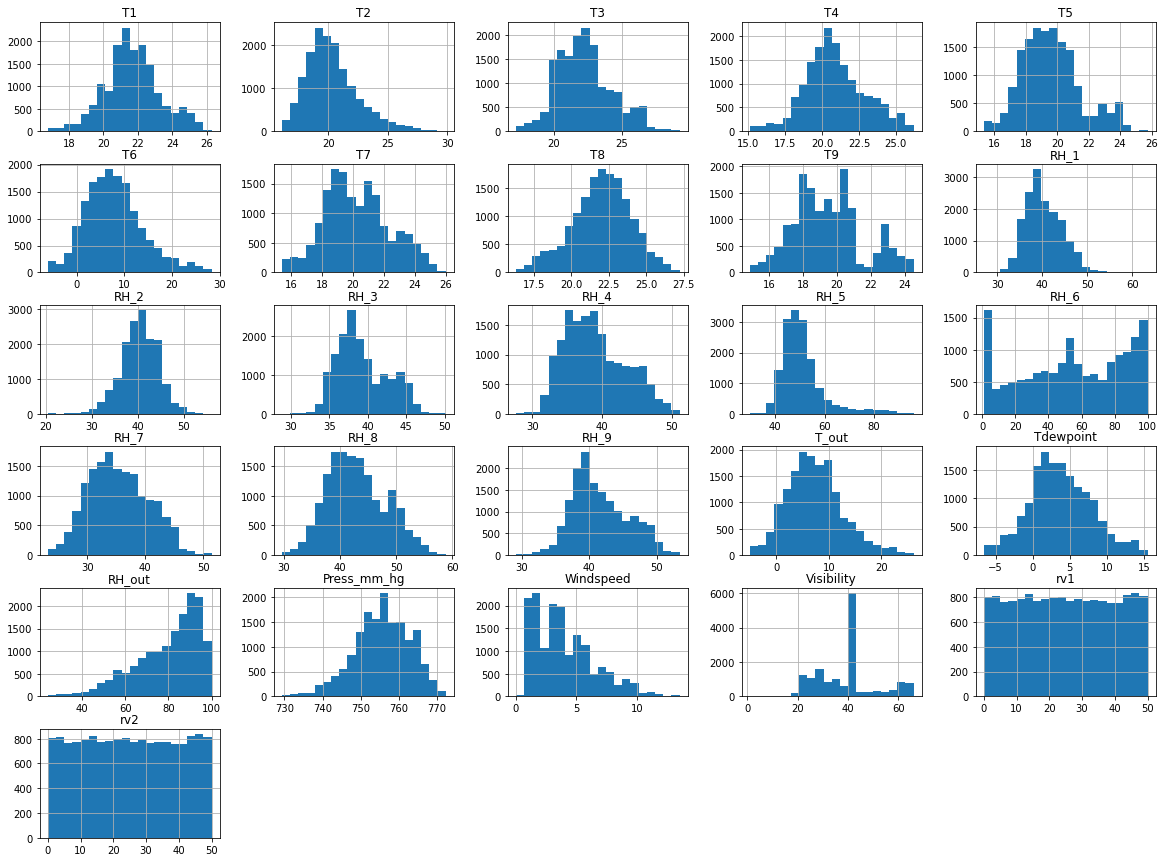

In [101]:
# Distribution wrt all features
feature_vars.hist(bins=20, figsize= (20,15));

A few variables have irregular distribution - analyzing them separately using distplots

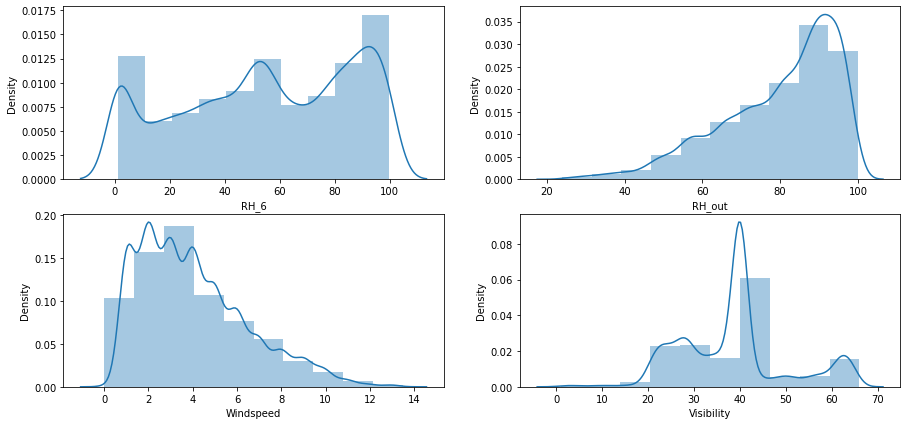

In [102]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
f,ax = plt.subplots(2,2, figsize= (15,7))

vis1 = sns.distplot(feature_vars['RH_6'], bins=10, ax=ax[0][0])
vis2 = sns.distplot(feature_vars['RH_out'], bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars['Windspeed'], bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars['Visibility'], bins=10, ax=ax[1][1])

<AxesSubplot:xlabel='Appliance consumption', ylabel='Frequency'>

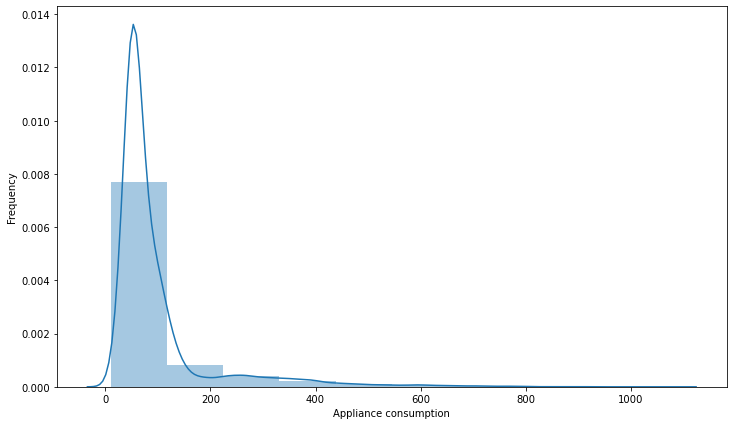

In [103]:
# distribution of target variable
f = plt.figure(figsize=(12,7))
plt.xlabel('Appliance consumption')
plt.ylabel('Frequency')
sns.distplot(target_var, bins=10)

* All Temperature columns follow approximately Normal Distribution, except T9.
* All Humidity columns also follow approximately Normal Distribution, except RH_out and RH_6 (Because these sesors are placed outside).
* Windspeed column is Right-Skewed (+vely skewed).
* Visibility column is a little left skewed.
* Target variable Appliances is Positively Skewed, with most of the values around 100 Wh. There could be a few outliers as well.

In [104]:
# Appliances with <=200Wh
target_var[target_var<=200].count()/len(target_var)*100

Appliances    90.302762
dtype: float64

<AxesSubplot:>

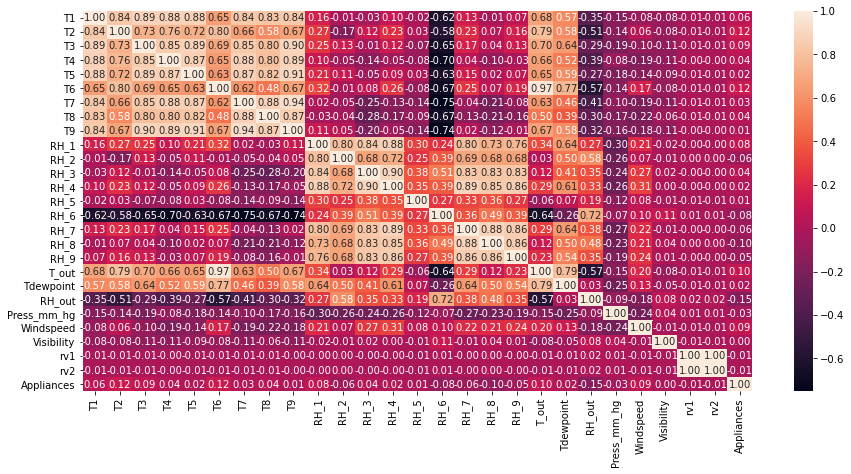

In [105]:
# checking correlation b/w variables
train_corr = train[col_temp + col_hum + col_weather + col_randoms + col_target]
corr = train_corr.corr()

import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize= (15,7))
sns.heatmap(corr, annot=True, fmt='.2f')

* All temperature variables: T1 to T9 an dT_out have +ve correlation with Appliances. T6 and T_out have high correlation and columns T7, T5, T4, T3 are also highly correlated with T9 -  We can remove T6 and T9.
* Visibility, Tdewpoint, Press_mm_hg have low correlation with Appliances.
* None of the Humidity columns and the random variables are correlated with Appliances column.

In [106]:
# data pre-processing
train_X = train[feature_vars.columns]
train_y = train[target_var.columns]

test_X = test[feature_vars.columns]
test_y = test[target_var.columns]

In [107]:
# dropping the columns T6, T9 as they are correlated with other columns, dropping rv1, rv2 and Visibilty as they are not correlated with the target variable

train_X.drop(['T6','T9','rv1','rv2','Visibility'], axis=1, inplace=True)
test_X.drop(['T6','T9','rv1','rv2','Visibility'], axis=1, inplace=True)

In [108]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train = train[list(train_X.columns.values) + col_target]
test = test[list(test_X.columns.values) + col_target]

sc_train = pd.DataFrame(columns=train.columns, index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test = pd.DataFrame(columns=test.columns, index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [109]:
sc_train.head(2)

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9830,0.255607,-0.338420,-0.189016,-0.031174,-0.540755,-0.506639,0.322567,-1.096080,-0.574482,-1.153189,-0.979126,-0.816331,-0.280508,-1.038856,-0.908821,-1.067121,-0.409018,-0.278613,0.237467,0.941875,-0.423272,-0.663302
8112,-0.678270,-1.022369,-0.633850,-0.124109,-0.709134,-0.906749,-0.783993,-0.510274,0.089234,-0.691793,-0.584765,-0.552143,0.762095,-0.120028,0.113296,-1.106492,-1.374955,-0.946638,1.224604,-0.209045,-1.241299,-0.466137


In [110]:
train_X = sc_train.drop(['Appliances'], axis=1)
train_y = sc_train['Appliances']

test_X = sc_test.drop(['Appliances'], axis=1)
test_y = sc_test['Appliances']

train_X.head(2)

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9830,0.255607,-0.338420,-0.189016,-0.031174,-0.540755,-0.506639,0.322567,-1.096080,-0.574482,-1.153189,-0.979126,-0.816331,-0.280508,-1.038856,-0.908821,-1.067121,-0.409018,-0.278613,0.237467,0.941875,-0.423272
8112,-0.678270,-1.022369,-0.633850,-0.124109,-0.709134,-0.906749,-0.783993,-0.510274,0.089234,-0.691793,-0.584765,-0.552143,0.762095,-0.120028,0.113296,-1.106492,-1.374955,-0.946638,1.224604,-0.209045,-1.241299


In [112]:
train_X.shape

(15788, 21)

In [113]:
# model iterations and selection

In [114]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors

In [115]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor()]]

In [116]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 0
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.3693277835845947,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 0.9999999999999999},
 {'Name': 'Ridge: ',
  'Train_Time': 0.18138551712036133,
  'Train_R2_Score': 0.1359506112338703,
  'Test_R2_Score': 0.12547803804787028,
  'Test_RMSE_Score': 0.9351587896994443},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.010892629623413086,
  'Train_R2_Score': 0.6960209666581332,
  'Test_R2_Score': 0.4563762028772579,
  'Test_RMSE_Score': 0.7373084816565872},
 {'Name': 'RandomForest ',
  'Train_Time': 69.88546180725098,
  'Train_R2_Score': 0.9415227452753612,
  'Test_R2_Score': 0.5249130644902034,
  'Test_RMSE_Score': 0.6892655043666385}]

In [118]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.369328,0.000000,0.000000,1.000000
1,Ridge:,0.181386,0.135951,0.125478,0.935159
2,KNeighborsRegressor:,0.010893,0.696021,0.456376,0.737308
3,RandomForest,69.885462,0.941523,0.524913,0.689266


* Best results on test set are given by Random Forest with R2 score of ~0.52
* Least RMSE score is also by Random Forest ~0.68.

## References (add your references below)
[1] Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,

[2] Python documentation